# Modes of Hollow Core Waveguide with Walls of Different Thicknesses

Here we try to understand how loss is mediated at resonance wavelengths for the hollow core guide with differing wall thicknesses.  We do this by looking at the wavelength dependent behavior of the guided, leaky and radiation modes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf_imag
from scipy.optimize import newton, bisect
plt.style.use('dark_background')
%matplotlib widget

# Setup Waveguide and input fields

In [2]:
Ts = [6.5, 2, 14, 3, 6.5]

A = SlabExact(scale=1e-5, Ts=Ts,
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[200, 200, 400, 200, 200],
              symmetric=True)

## Find Left and Right resonant wavelengths

In [3]:
resonant_wls_L = 2 * A.Ts[1] *  np.array([1/l for l in range(1,9)]) * np.sqrt(A.n_high**2 - A.n0**2) * A.scale
resonant_wls_R = 2 * A.Ts[3] *  np.array([1/l for l in range(1,9)]) * np.sqrt(A.n_high**2 - A.n0**2) * A.scale

print('shared wavelengths: ', set(resonant_wls_L).intersection(set(resonant_wls_R)))

shared wavelengths:  {2.072293415518179e-05, 1.0361467077590895e-05}


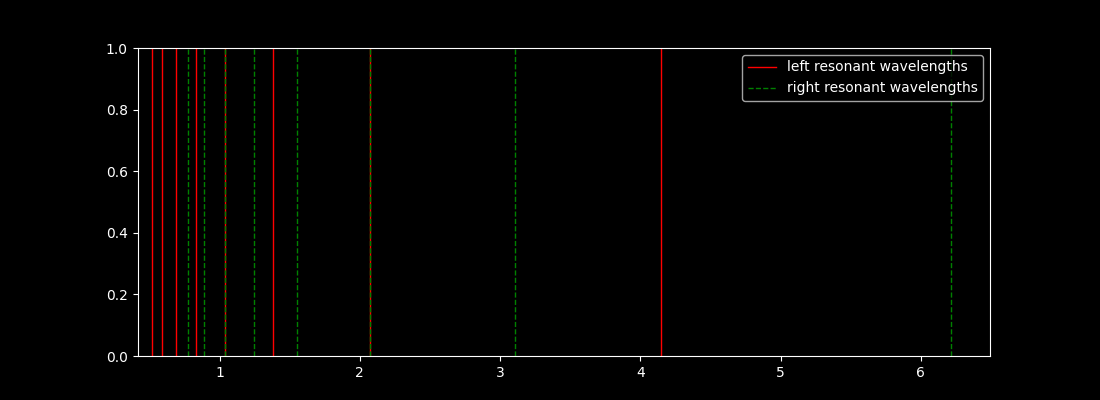

In [4]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11,4))
ax.axvline(resonant_wls_L[0] / A.scale, linewidth=1, color='r', label='left resonant wavelengths')
ax.axvline(resonant_wls_R[0] / A.scale, linewidth=1, color='g', linestyle='--', label='right resonant wavelengths')

for r in resonant_wls_L[1:]:
    ax.axvline(r/A.scale, linewidth=1, color='r')
for r in resonant_wls_R[1:]:
    ax.axvline(r/A.scale, linewidth=1, color='g', linestyle='--')
plt.legend()

In [5]:
left_resonant_wl = resonant_wls_L[0]
right_resonant_wl = resonant_wls_R[1]
double_resonant_wl = resonant_wls_L[1]
low_loss_wl = (left_resonant_wl + right_resonant_wl)/2

left_resonant_wl, right_resonant_wl, low_loss_wl, double_resonant_wl

(4.144586831036358e-05,
 3.108440123277268e-05,
 3.626513477156813e-05,
 2.072293415518179e-05)

# Interactive plot of modes across double, right and left resonance wavelengths

Starts just below double wavelength, then increases to right wall and then left wall resonances.

interactive(children=(FloatSlider(value=1.9e-05, description='wl', layout=Layout(width='90%'), max=4.3e-05, mi…

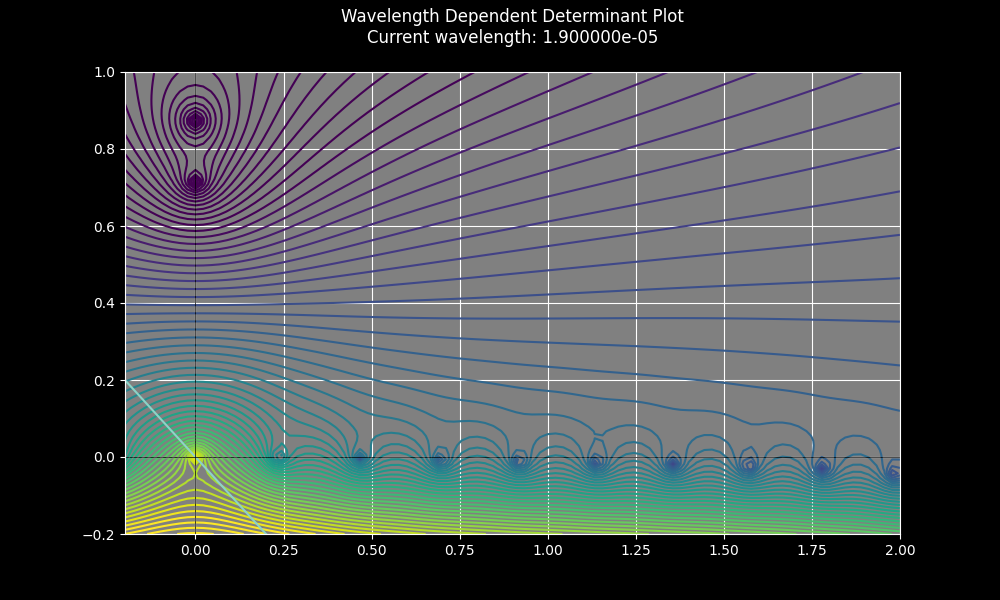

In [6]:
A.interactive_determinant_plot(minwl=1.9e-5, maxwl=4.3e-5,
                              rmin=-.2, rmax=2, imin=-.2, imax=1, sdp_sign=-1)

# Double Resonance Study

## Guided mode structure near double resonance

Here we examine the structure of guided modes near the double resonant wavelength.

In [7]:
A.wl = .994*double_resonant_wl

guesses1 = [
    .00085j,
    .125j,
]

Zs1 = [newton(A.determinant_Z, np.array(guess)) for guess in guesses1]
for Z in Zs1:
    plt.plot(Z.real, Z.imag, marker='o', markersize=4)
Fs1 = [A.fields_Z(Z) for Z in Zs1]

/home/pv/local/slab/slab.py:1043: UserWarning: Provided mode type guided, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


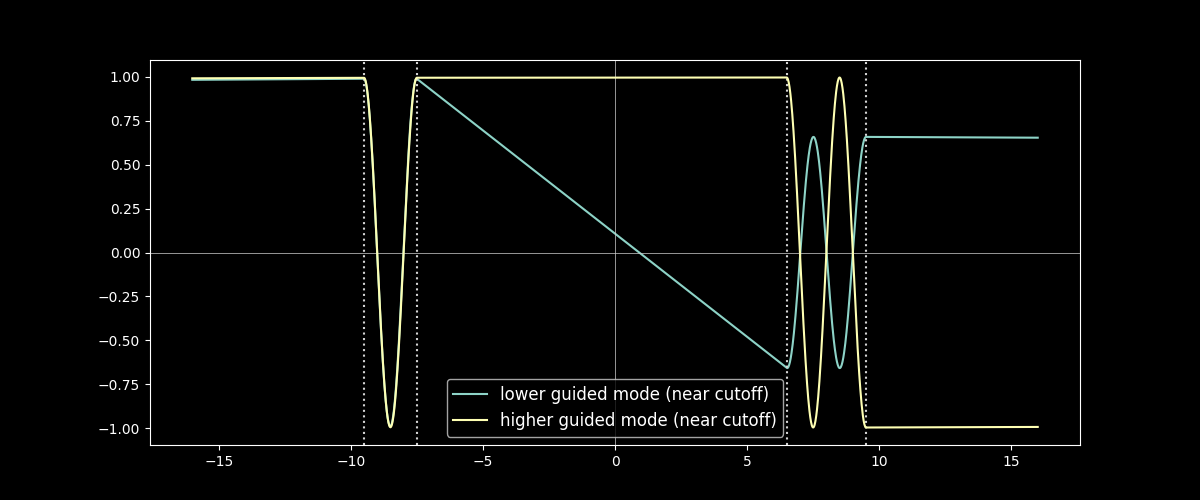

In [9]:
A.wl = .99998*double_resonant_wl
guesses2 = [
    .000085j,
]

Zs2 = [newton(A.determinant_Z, np.array(guess)) for guess in guesses2]
for Z in Zs2:
    plt.plot(Z.real, Z.imag, marker='o', markersize=4)
Fs2 = [A.fields_Z(Z) for Z in Zs2]

A.plot_field_1d(Fs1[0], label='lower guided mode (near cutoff)')
A.add_1d_plot(Fs2[0], label='higher guided mode (near cutoff)')


### Observations

Prior to the double resonance wavelength, the guided mode with the lower pure imaginary propagation constant (Z type) is cutoff, and it has the structure seen above in the green curve.  The second mode to get cutoff has the structure seen in the yellow curve.  At cutoff, these modes are both non-trivial and become radiation modes (pure real Z).  

# Radiation modes at double resonance

interactive(children=(FloatSlider(value=1e-05, description='Z', layout=Layout(width='90%'), max=0.1, min=1e-05…

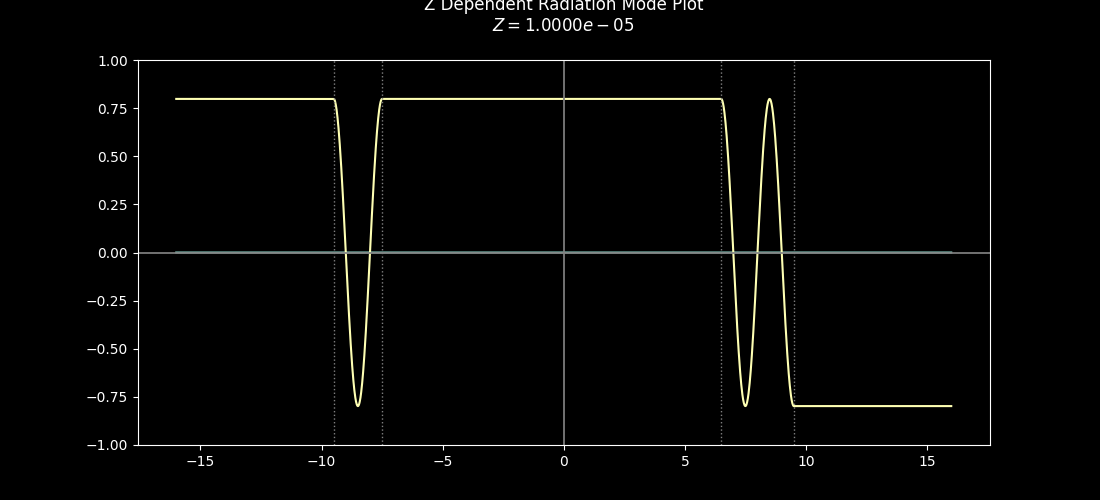

In [10]:
A.wl=double_resonant_wl
A.interactive_radiation_mode_plot(minZ=1e-5, maxZ=1e-1, ylims=(-1,1), sign='both')

# Left Resonance Study

## Guided mode structure near left wall resonance

Here we examine the structure of guided modes near the left resonant wavelength. For these types of resonance, only one mode cutoff occurs.  As in other cases, cutoff of guided modes happens before the true resonance value.  The resonance value appears to be associated with the passage of one of the new leaky modes past the SDP contour.

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

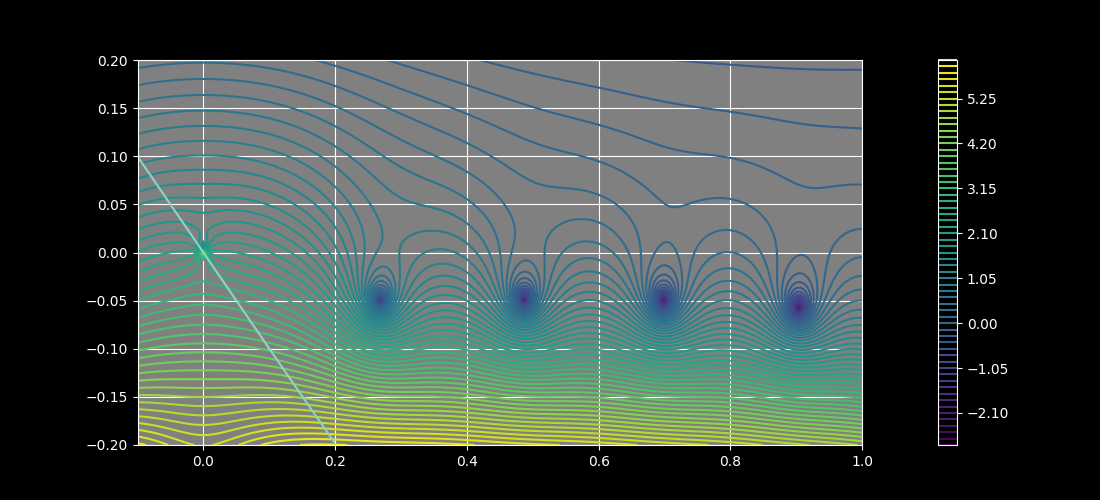

In [18]:
A.wl = .9851*left_resonant_wl
A.determinant_plot(-.1,1,-.2,.2)

In [19]:
guesses1 = [
    .0000005j,
    # .125j,
]
Zs1 = [newton(A.determinant_Z, np.array(guess)) for guess in guesses1]
for Z in Zs1:
    plt.plot(Z.real, Z.imag, marker='o', markersize=4)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

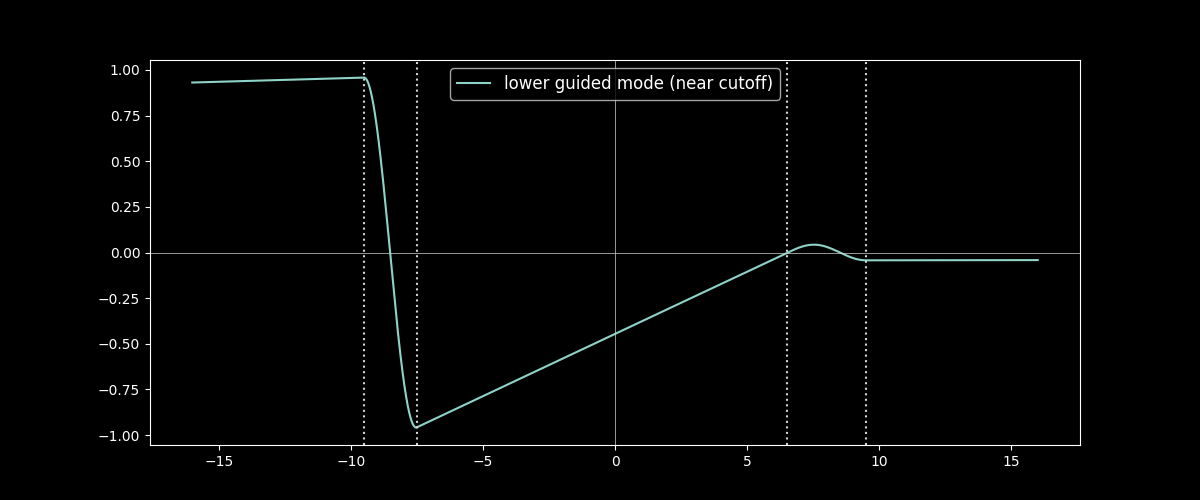

In [20]:
Fs1 = [A.fields_Z(Z) for Z in Zs1]
A.plot_field_1d(Fs1[0], label='lower guided mode (near cutoff)')

# Radiation modes at left wall resonance

interactive(children=(FloatSlider(value=1e-05, description='Z', layout=Layout(width='90%'), max=0.1, min=1e-05…

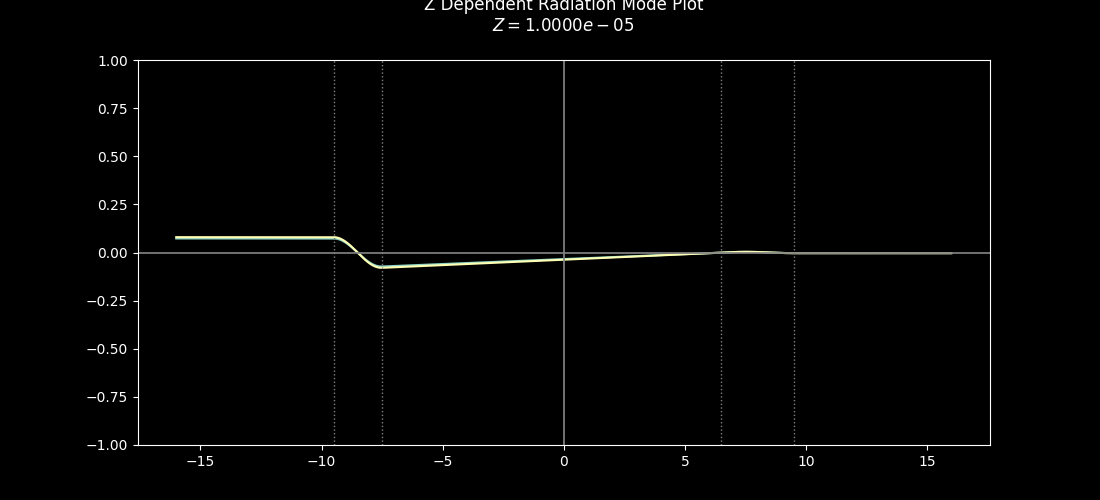

In [78]:
cutoff_guess = 4.086562615401849e-05
A.interactive_radiation_mode_plot(minwl=cutoff_guess, maxwl=cutoff_guess, Nwl=1000, minZ=1e-5, maxZ=1e-1, ylims=(-1,1), sign='both')

## Finding cutoff of guided mode

How can we implement this?

In [34]:
def dZ0(wl, minZ=-.06, maxZ=.2, Nz=1000):
    A.wl = wl
    Zs = 1j * np.linspace(minZ, maxZ, Nz)
    dZ = (Zs[1] - Zs[0]) / 1j
    vals = A.determinant_Z(Zs, 'TE', 'guided', 'LR', True)
    dvals = (vals[1:] - vals[:-1]) / dZ
    idx = np.argmin(np.abs(dvals))
    return Zs[idx].imag


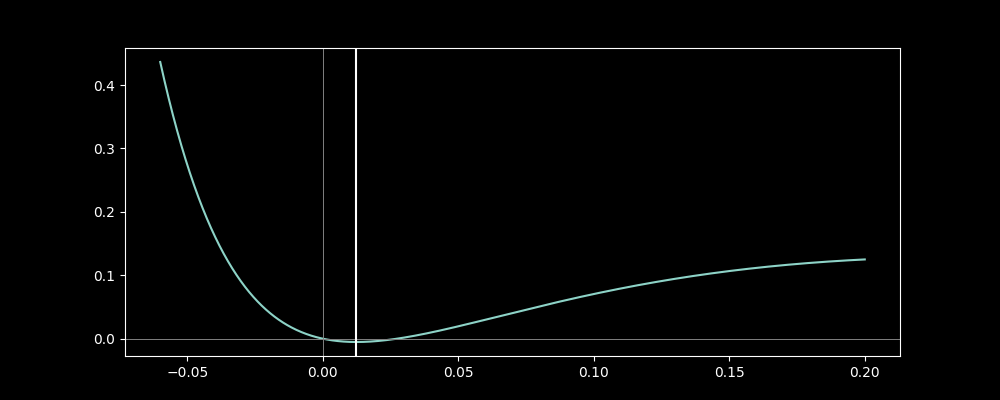

In [39]:
plt.close('all')
A.wl = .98*left_resonant_wl
zmin = -.06
zmax = .2
Nz=1000
zero_dz = dZ0(A.wl, zmin, zmax, Nz)
plotlogf_imag(A.determinant_Z, zmin, zmax, 'TE', 'guided', 'LR', True, n=Nz, log_off=True, abs_off=True)
plt.axvline(zero_dz)

In [46]:
cutoffwl = bisect(dZ0, .98*left_resonant_wl, .99*left_resonant_wl, args=(-.06, .2, 100), xtol=1e-14)

interactive(children=(FloatSlider(value=1e-05, description='Z', layout=Layout(width='90%'), max=0.001, min=1e-…

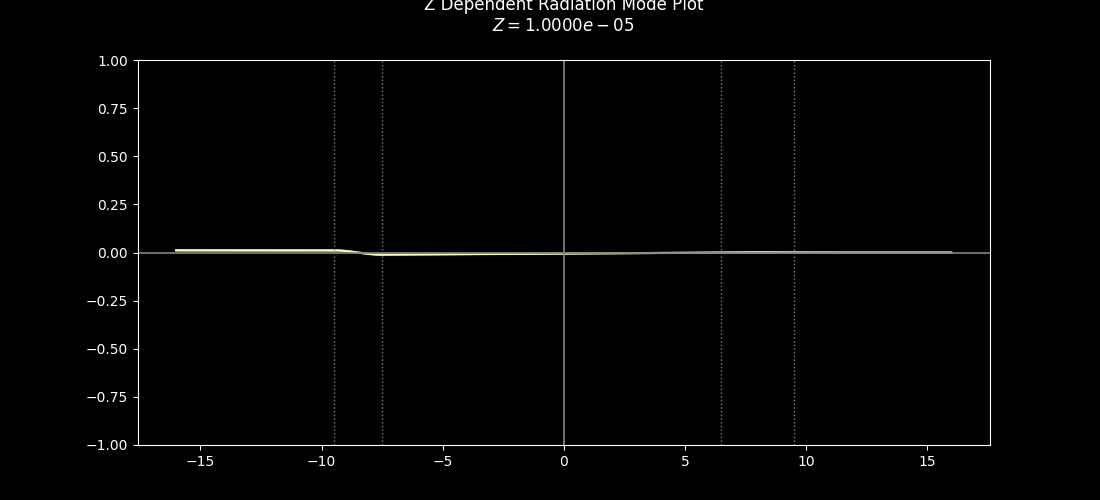

In [48]:
A.wl = cutoffwl
A.interactive_radiation_mode_plot(minZ=1e-5, maxZ=1e-3, ylims=(-1,1), sign='both')

## Guide mode at cutoff

Is it trival?

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

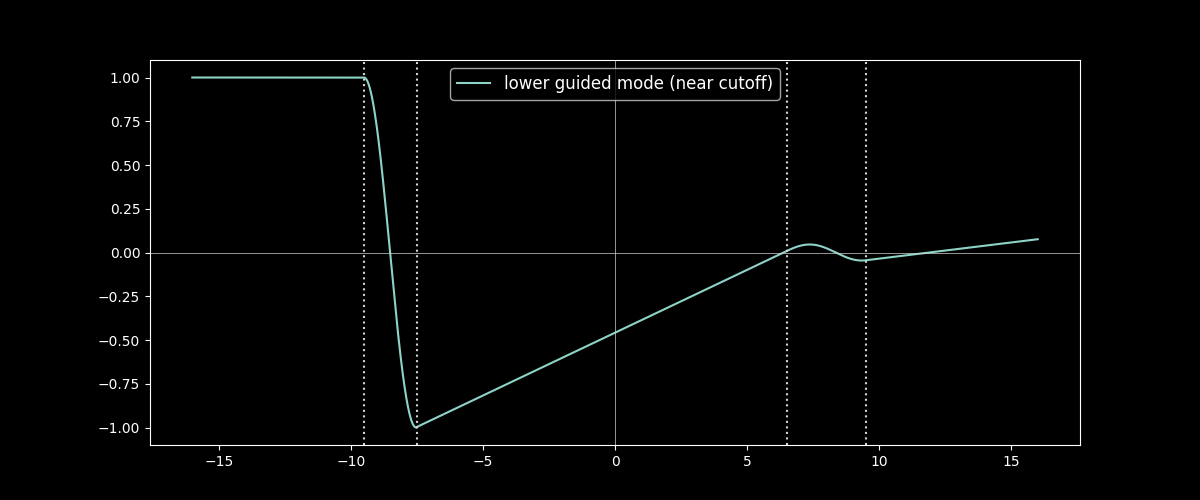

In [61]:
A.wl = cutoffwl
A.plot_field_1d(A.fields_Z(1e-13), label='lower guided mode (near cutoff)')

## Observations

- It appears that at cutoff (which is not the same as resonance), this mode is trival when found as a radiation mode, but not as a guided mode.

## Radiation mode at true left resonance